
# Definição do problema
 * Analise fundamentalista
  * Uso da API - Fundamentus
  * Tratamento/filtro de dados
  * Avaliação de indicadores 

 * Análise tecnica
  * Uso da API YahooFinance
  * Avaliação da série temporal
  * Aplicação de indicadores técnicos

## Import Lib

In [ ]:
!pip install pandas
!pip install numpy
!pip install missingno
!pip install fundamentus
!pip install yfinance
!pip install pandas-profiling==3.1.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import missingno as msno
import fundamentus as fd
import pandas_profiling as pp
import pandas_datareader.data as web
import matplotlib.pyplot as plt
yf.pdr_override()
from pandas.core import window

##  Analise fundamentalista


In [ ]:
df_inicial = fd.get_resultado()
df_inicial.reset_index(inplace=True)
df_inicial

Multiples,papel,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,...,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
0,AALR3,21.49,-18.76,2.37,2.328,0.0000,0.966,-30.99,84.59,-2.49,...,21.90,0.0275,-0.1180,0.0132,-0.1263,0.86,10209400.0,1.072550e+09,0.85,0.0116
1,ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.0000,0.1537,0.00,0.0,5.205390e+09,0.00,0.2753
2,ABCB4,18.27,5.16,0.79,0.000,0.0765,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.0000,0.1537,0.00,16717200.0,5.205390e+09,0.00,0.2753
3,ABEV3,12.86,15.46,2.25,2.563,0.0593,1.426,30.80,13.17,-22.62,...,8.99,0.1947,0.1715,0.1498,0.1452,1.19,520280000.0,9.017800e+10,0.03,0.1298
4,ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,...,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,WLMM4,23.02,7.39,1.39,0.470,0.0517,1.135,2.69,7.21,3.31,...,6.35,0.0653,0.0636,0.1832,0.1875,5.14,58316.4,6.050780e+08,0.02,0.2820
965,WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,...,25.02,0.0970,-0.0705,0.0239,-0.1486,1.44,0.0,2.124390e+08,6.51,-0.1448
966,WSON33,67.00,8.07,0.98,1.067,0.0000,0.400,13.41,2.42,-0.89,...,5.08,0.4414,0.1358,0.1836,0.1217,1.26,0.0,2.148530e+09,1.21,0.0523
967,YDUQ3,8.54,-55.72,0.87,0.585,0.0148,0.266,1.78,4.85,-0.66,...,5.44,0.1207,-0.0101,0.0669,-0.0157,2.07,48316500.0,3.024090e+09,1.89,0.0660


In [ ]:
df_csv = pd.read_csv('ativos.csv')
df_csv

,Ativo,Nome
0,BBDC4,Banco Bradesco
1,AALR3,Alliar
2,ABCB4,Banco ABC Brasil
3,ABEV3,Ambev
4,AERI3,Aeris
...,...,...
518,WIZS3,Wiz Soluções
519,WLMM3,WLM
520,WLMM4,WLM
521,YDUQ3,YDUQS


In [ ]:
papeis = df_csv['Ativo'].to_list()
print(papeis)

['BBDC4', 'AALR3', 'ABCB4', 'ABEV3', 'AERI3', 'AESB3', 'AFLT3', 'AGRO3', 'AGXY3', 'AHEB3', 'AHEB5', 'AHEB6', 'ALLD3', 'ALPA3', 'ALPA4', 'ALPK3', 'ALSO3', 'ALUP3', 'ALUP4', 'AMAR3', 'AMBP3', 'AMER3', 'ANIM3', 'APER3', 'APTI4', 'ARML3', 'ARZZ3', 'ASAI3', 'ATMP3', 'ATOM3', 'AVLL3', 'AZEV3', 'AZEV4', 'AZUL4', 'B3SA3', 'BAHI3', 'BALM3', 'BALM4', 'BAUH4', 'BAZA3', 'BBAS3', 'BBDC3', 'BBRK3', 'BBSE3', 'BDLL3', 'BDLL4', 'BEEF3', 'BEES3', 'BEES4', 'BGIP3', 'BGIP4', 'BIDI3', 'BIDI4', 'BIOM3', 'BKBR3', 'BLAU3', 'BLUT3', 'BLUT4', 'BMEB3', 'BMEB4', 'BMGB4', 'BMIN3', 'BMIN4', 'BMKS3', 'BMOB3', 'BNBR3', 'BOAS3', 'BOBR4', 'BPAC3', 'BPAC5', 'BPAN4', 'BPAR3', 'BRAP3', 'BRAP4', 'BRDT3', 'BRFS3', 'BRGE11', 'BRGE12', 'BRGE3', 'BRGE5', 'BRGE6', 'BRGE7', 'BRGE8', 'BRIT3', 'BRIV3', 'BRIV4', 'BRKM3', 'BRKM5', 'BRKM6', 'BRML3', 'BRPR3', 'BRSR3', 'BRSR5', 'BRSR6', 'BSEV3', 'BSLI3', 'BSLI4', 'BTOW3', 'BTTL3', 'CALI3', 'CALI4', 'CAMB3', 'CAML3', 'CARD3', 'CASH3', 'CASN3', 'CASN4', 'CBAV3', 'CBEE3', 'CCPR3', 'CCRO3'

In [ ]:
len(papeis)

523

In [ ]:
df_merge = df_csv.merge(df_inicial, how='inner', left_on='Ativo', right_on='papel')
df_merge

,Ativo,Nome,papel,cotacao,pl,pvp,psr,dy,pa,pcg,...,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
0,BBDC4,Banco Bradesco,BBDC4,12.67,6.51,0.88,0.000,0.0794,0.000,0.00,...,0.00,0.0000,0.0000,0.0000,0.1344,0.00,9.124900e+08,1.542630e+11,0.00,0.0613
1,AALR3,Alliar,AALR3,21.49,-18.76,2.37,2.328,0.0000,0.966,-30.99,...,21.90,0.0275,-0.1180,0.0132,-0.1263,0.86,1.020940e+07,1.072550e+09,0.85,0.0116
2,ABCB4,Banco ABC Brasil,ABCB4,18.27,5.16,0.79,0.000,0.0765,0.000,0.00,...,0.00,0.0000,0.0000,0.0000,0.1537,0.00,1.671720e+07,5.205390e+09,0.00,0.2753
3,ABEV3,Ambev,ABEV3,12.86,15.46,2.25,2.563,0.0593,1.426,30.80,...,8.99,0.1947,0.1715,0.1498,0.1452,1.19,5.202800e+08,9.017800e+10,0.03,0.1298
4,AERI3,Aeris,AERI3,1.17,-9.67,1.01,0.363,0.0177,0.237,0.71,...,6.79,0.0769,-0.0376,0.0798,-0.1048,1.95,1.085260e+07,8.848680e+08,2.05,0.0573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,WIZS3,Wiz Soluções,WIZS3,7.16,7.33,2.64,1.306,0.0821,0.575,-11.96,...,2.64,0.4416,0.2493,0.2274,0.3593,0.79,9.656110e+06,4.344440e+08,0.62,0.1241
498,WLMM3,WLM,WLMM3,21.50,6.90,1.29,0.439,0.0503,1.060,2.52,...,5.89,0.0653,0.0636,0.1832,0.1875,5.14,9.545000e+01,6.050780e+08,0.02,0.2820
499,WLMM4,WLM,WLMM4,23.02,7.39,1.39,0.470,0.0517,1.135,2.69,...,6.35,0.0653,0.0636,0.1832,0.1875,5.14,5.831640e+04,6.050780e+08,0.02,0.2820
500,YDUQ3,YDUQS,YDUQ3,8.54,-55.72,0.87,0.585,0.0148,0.266,1.78,...,5.44,0.1207,-0.0101,0.0669,-0.0157,2.07,4.831650e+07,3.024090e+09,1.89,0.0660


In [ ]:
df_merge_lista = df_merge['Ativo'].to_list()
len(df_merge_lista)

502

In [ ]:
#df_setor = fd.get_papel(df_merge_lista)
#df_setor

In [ ]:
#df_setor.to_csv('Data_Frame_Tipo_Neg.csv')

In [ ]:
df_setor = pd.read_csv('Data_Frame_Tipo_Neg.csv')
df_setor

,Unnamed: 0,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,...,Rec_Servicos_3m,Lucro_Liquido_3m,Disponibilidades,Ativo_Circulante,Div_Bruta,Div_Liquida,Receita_Liquida_12m,EBIT_12m,Receita_Liquida_3m,EBIT_3m
0,AALR3,ON NM,ALLIAR ON NM,Serv.Méd.Hospit. Análises e Diagnósticos,Serv.Méd.Hospit. Análises e Diagnósticos,21.49,2023-02-10,15.73,21.66,10209400,...,NaN,-75123000,2.478290e+08,5.087980e+08,9.101600e+08,6.623310e+08,1.092130e+09,3.005200e+07,2.807550e+08,-5.522000e+06
1,ABCB4,PN N2,ABC Brasil PN N2,Intermediários Financeiros,Bancos,18.27,2023-02-10,14.34,22.30,16717200,...,90254000.0,197272000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABEV3,ON,AMBEV S/A ON,Bebidas,Cervejas e Refrigerantes,12.86,2023-02-10,12.48,16.03,520280000,...,NaN,3108560000,1.905990e+10,4.155700e+10,2.980480e+09,-1.607940e+10,7.902660e+10,1.538410e+10,2.058760e+10,3.728450e+09
3,AERI3,ON NM,AERIS ON NM,Máquinas e Equipamentos,Máq. e Equip. Industriais,1.17,2023-02-10,0.88,6.26,10852600,...,NaN,-39425000,1.061720e+09,2.597560e+09,1.816730e+09,7.550080e+08,2.468880e+09,1.897360e+08,6.547720e+08,7.385300e+07
4,AESB3,ON NM,AES BRASIL ON NM,Energia Elétrica,Energia Elétrica,9.88,2023-02-10,9.08,12.27,22995100,...,NaN,40501000,3.455380e+09,4.091870e+09,7.893510e+09,4.438120e+09,2.816160e+09,5.095860e+08,7.865580e+08,1.709340e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,WIZS3,ON NM,WIZ S.A. ON NM,Previdência e Seguros,Corretoras de Seguros,7.16,2023-02-08,6.30,9.10,9656110,...,NaN,52249000,2.401490e+08,3.574740e+08,2.696830e+08,2.953400e+07,8.764660e+08,3.870560e+08,2.385950e+08,1.352210e+08
498,WLMM3,ON,WLM ON,Comércio,Material de Transporte,21.50,2022-12-21,19.34,31.11,95,...,NaN,32238000,8.401700e+07,3.863440e+08,9.759000e+06,-7.425800e+07,1.782070e+09,1.162810e+08,6.423550e+08,3.815600e+07
499,WLMM4,PN,WLM PN,Comércio,Material de Transporte,23.02,2023-02-10,15.32,38.33,58316,...,NaN,32238000,8.401700e+07,3.863440e+08,9.759000e+06,-7.425800e+07,1.782070e+09,1.162810e+08,6.423550e+08,3.815600e+07
500,YDUQ3,ON,YDUQS PART ON,Diversos,Serviços Educacionais,8.54,2023-02-10,8.32,22.76,48316500,...,NaN,14625000,1.583530e+09,2.871740e+09,5.723460e+09,4.139920e+09,4.513670e+09,5.446080e+08,1.135490e+09,1.930100e+08


In [ ]:
df_setor.columns

Index(['Unnamed: 0', 'Tipo', 'Empresa', 'Setor', 'Subsetor', 'Cotacao',
       'Data_ult_cot', 'Min_52_sem', 'Max_52_sem', 'Vol_med_2m',
       'Valor_de_mercado', 'Valor_da_firma', 'Ult_balanco_processado',
       'Nro_Acoes', 'PL', 'PVP', 'PEBIT', 'PSR', 'PAtivos', 'PCap_Giro',
       'PAtiv_Circ_Liq', 'Div_Yield', 'EV_EBITDA', 'EV_EBIT', 'Cres_Rec_5a',
       'LPA', 'VPA', 'Marg_Bruta', 'Marg_EBIT', 'Marg_Liquida', 'EBIT_Ativo',
       'ROIC', 'ROE', 'Liquidez_Corr', 'Div_Br_Patrim', 'Giro_Ativos', 'Ativo',
       'Cart_de_Credito', 'Depositos', 'Patrim_Liq', 'Result_Int_Financ_12m',
       'Rec_Servicos_12m', 'Lucro_Liquido_12m', 'Result_Int_Financ_3m',
       'Rec_Servicos_3m', 'Lucro_Liquido_3m', 'Disponibilidades',
       'Ativo_Circulante', 'Div_Bruta', 'Div_Liquida', 'Receita_Liquida_12m',
       'EBIT_12m', 'Receita_Liquida_3m', 'EBIT_3m'],
      dtype='object')

In [ ]:
#######

In [ ]:
df_setor.rename(columns ={'Unnamed: 0':'Ativos'},inplace=True)
df_setor

,Ativos,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,...,Rec_Servicos_3m,Lucro_Liquido_3m,Disponibilidades,Ativo_Circulante,Div_Bruta,Div_Liquida,Receita_Liquida_12m,EBIT_12m,Receita_Liquida_3m,EBIT_3m
0,AALR3,ON NM,ALLIAR ON NM,Serv.Méd.Hospit. Análises e Diagnósticos,Serv.Méd.Hospit. Análises e Diagnósticos,21.49,2023-02-10,15.73,21.66,10209400,...,NaN,-75123000,2.478290e+08,5.087980e+08,9.101600e+08,6.623310e+08,1.092130e+09,3.005200e+07,2.807550e+08,-5.522000e+06
1,ABCB4,PN N2,ABC Brasil PN N2,Intermediários Financeiros,Bancos,18.27,2023-02-10,14.34,22.30,16717200,...,90254000.0,197272000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABEV3,ON,AMBEV S/A ON,Bebidas,Cervejas e Refrigerantes,12.86,2023-02-10,12.48,16.03,520280000,...,NaN,3108560000,1.905990e+10,4.155700e+10,2.980480e+09,-1.607940e+10,7.902660e+10,1.538410e+10,2.058760e+10,3.728450e+09
3,AERI3,ON NM,AERIS ON NM,Máquinas e Equipamentos,Máq. e Equip. Industriais,1.17,2023-02-10,0.88,6.26,10852600,...,NaN,-39425000,1.061720e+09,2.597560e+09,1.816730e+09,7.550080e+08,2.468880e+09,1.897360e+08,6.547720e+08,7.385300e+07
4,AESB3,ON NM,AES BRASIL ON NM,Energia Elétrica,Energia Elétrica,9.88,2023-02-10,9.08,12.27,22995100,...,NaN,40501000,3.455380e+09,4.091870e+09,7.893510e+09,4.438120e+09,2.816160e+09,5.095860e+08,7.865580e+08,1.709340e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,WIZS3,ON NM,WIZ S.A. ON NM,Previdência e Seguros,Corretoras de Seguros,7.16,2023-02-08,6.30,9.10,9656110,...,NaN,52249000,2.401490e+08,3.574740e+08,2.696830e+08,2.953400e+07,8.764660e+08,3.870560e+08,2.385950e+08,1.352210e+08
498,WLMM3,ON,WLM ON,Comércio,Material de Transporte,21.50,2022-12-21,19.34,31.11,95,...,NaN,32238000,8.401700e+07,3.863440e+08,9.759000e+06,-7.425800e+07,1.782070e+09,1.162810e+08,6.423550e+08,3.815600e+07
499,WLMM4,PN,WLM PN,Comércio,Material de Transporte,23.02,2023-02-10,15.32,38.33,58316,...,NaN,32238000,8.401700e+07,3.863440e+08,9.759000e+06,-7.425800e+07,1.782070e+09,1.162810e+08,6.423550e+08,3.815600e+07
500,YDUQ3,ON,YDUQS PART ON,Diversos,Serviços Educacionais,8.54,2023-02-10,8.32,22.76,48316500,...,NaN,14625000,1.583530e+09,2.871740e+09,5.723460e+09,4.139920e+09,4.513670e+09,5.446080e+08,1.135490e+09,1.930100e+08


In [ ]:
df_setor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ativos                  502 non-null    object 
 1   Tipo                    502 non-null    object 
 2   Empresa                 502 non-null    object 
 3   Setor                   502 non-null    object 
 4   Subsetor                502 non-null    object 
 5   Cotacao                 502 non-null    float64
 6   Data_ult_cot            499 non-null    object 
 7   Min_52_sem              502 non-null    float64
 8   Max_52_sem              502 non-null    float64
 9   Vol_med_2m              502 non-null    int64  
 10  Valor_de_mercado        502 non-null    int64  
 11  Valor_da_firma          502 non-null    object 
 12  Ult_balanco_processado  502 non-null    object 
 13  Nro_Acoes               502 non-null    int64  
 14  PL                      502 non-null    in

In [ ]:
df_operando = df_setor[df_setor['Data_ult_cot']== '2023-02-10']
df_operando

,Ativos,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,...,Rec_Servicos_3m,Lucro_Liquido_3m,Disponibilidades,Ativo_Circulante,Div_Bruta,Div_Liquida,Receita_Liquida_12m,EBIT_12m,Receita_Liquida_3m,EBIT_3m
0,AALR3,ON NM,ALLIAR ON NM,Serv.Méd.Hospit. Análises e Diagnósticos,Serv.Méd.Hospit. Análises e Diagnósticos,21.49,2023-02-10,15.73,21.66,10209400,...,NaN,-75123000,2.478290e+08,5.087980e+08,9.101600e+08,6.623310e+08,1.092130e+09,3.005200e+07,2.807550e+08,-5.522000e+06
1,ABCB4,PN N2,ABC Brasil PN N2,Intermediários Financeiros,Bancos,18.27,2023-02-10,14.34,22.30,16717200,...,90254000.0,197272000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABEV3,ON,AMBEV S/A ON,Bebidas,Cervejas e Refrigerantes,12.86,2023-02-10,12.48,16.03,520280000,...,NaN,3108560000,1.905990e+10,4.155700e+10,2.980480e+09,-1.607940e+10,7.902660e+10,1.538410e+10,2.058760e+10,3.728450e+09
3,AERI3,ON NM,AERIS ON NM,Máquinas e Equipamentos,Máq. e Equip. Industriais,1.17,2023-02-10,0.88,6.26,10852600,...,NaN,-39425000,1.061720e+09,2.597560e+09,1.816730e+09,7.550080e+08,2.468880e+09,1.897360e+08,6.547720e+08,7.385300e+07
4,AESB3,ON NM,AES BRASIL ON NM,Energia Elétrica,Energia Elétrica,9.88,2023-02-10,9.08,12.27,22995100,...,NaN,40501000,3.455380e+09,4.091870e+09,7.893510e+09,4.438120e+09,2.816160e+09,5.095860e+08,7.865580e+08,1.709340e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,WHRL3,ON,WHIRLPOOL S.A. ON,Utilidades Domésticas,Eletrodomésticos,4.48,2023-02-10,4.36,6.07,11788,...,NaN,120995000,1.279860e+09,5.631920e+09,8.060050e+08,-4.738530e+08,1.093420e+10,7.717110e+08,2.609330e+09,1.646430e+08
496,WHRL4,PN,WHIRLPOOL S.A. PN,Utilidades Domésticas,Eletrodomésticos,4.70,2023-02-10,4.45,6.72,24191,...,NaN,120995000,1.279860e+09,5.631920e+09,8.060050e+08,-4.738530e+08,1.093420e+10,7.717110e+08,2.609330e+09,1.646430e+08
499,WLMM4,PN,WLM PN,Comércio,Material de Transporte,23.02,2023-02-10,15.32,38.33,58316,...,NaN,32238000,8.401700e+07,3.863440e+08,9.759000e+06,-7.425800e+07,1.782070e+09,1.162810e+08,6.423550e+08,3.815600e+07
500,YDUQ3,ON,YDUQS PART ON,Diversos,Serviços Educacionais,8.54,2023-02-10,8.32,22.76,48316500,...,NaN,14625000,1.583530e+09,2.871740e+09,5.723460e+09,4.139920e+09,4.513670e+09,5.446080e+08,1.135490e+09,1.930100e+08


In [ ]:
df_operando_fit = df_operando[['Ativos', 'Empresa', 'Setor', 'Subsetor', 'Cotacao',
       'Valor_de_mercado', 'Valor_da_firma', 'PL', 'PVP', 'PAtivos', 'PCap_Giro',
       'Div_Yield', 'Cres_Rec_5a', 'LPA', 'VPA', 'ROIC', 'ROE', 'Liquidez_Corr', 'Div_Br_Patrim',
       'Patrim_Liq', 'Lucro_Liquido_12m', 'Lucro_Liquido_3m', 
       'Div_Bruta', 'Div_Liquida']]
df_operando_fit

,Ativos,Empresa,Setor,Subsetor,Cotacao,Valor_de_mercado,Valor_da_firma,PL,PVP,PAtivos,...,VPA,ROIC,ROE,Liquidez_Corr,Div_Br_Patrim,Patrim_Liq,Lucro_Liquido_12m,Lucro_Liquido_3m,Div_Bruta,Div_Liquida
0,AALR3,ALLIAR ON NM,Serv.Méd.Hospit. Análises e Diagnósticos,Serv.Méd.Hospit. Análises e Diagnósticos,21.49,2542120000,3204450000,-1876,237,097,...,907,1.3%,-12.6%,086,085,1072550000,-135492000,-75123000,9.101600e+08,6.623310e+08
1,ABCB4,ABC Brasil PN N2,Intermediários Financeiros,Bancos,18.27,4130670000,-,516,79,-,...,2302,-,15.4%,-,-,5205390000,800234000,197272000,NaN,NaN
2,ABEV3,AMBEV S/A ON,Bebidas,Cervejas e Refrigerantes,12.86,202548000000,186468000000,1546,225,143,...,573,15.0%,14.5%,119,003,90178000000,13098300000,3108560000,2.980480e+09,-1.607940e+10
3,AERI3,AERIS ON NM,Máquinas e Equipamentos,Máq. e Equip. Industriais,1.17,896470000,1651480000,-967,101,024,...,115,8.0%,-10.5%,195,205,884868000,-92709000,-39425000,1.816730e+09,7.550080e+08
4,AESB3,AES BRASIL ON NM,Energia Elétrica,Energia Elétrica,9.88,5947040000,10385200000,-146119,142,039,...,694,4.5%,-0.1%,363,189,4175170000,-4070010,40501000,7.893510e+09,4.438120e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,WHRL3,WHIRLPOOL S.A. ON,Utilidades Domésticas,Eletrodomésticos,4.48,6732480000,6258630000,1244,276,083,...,163,21.4%,22.2%,110,033,2443420000,541394000,120995000,8.060050e+08,-4.738530e+08
496,WHRL4,WHIRLPOOL S.A. PN,Utilidades Domésticas,Eletrodomésticos,4.70,7063090000,6589240000,1305,289,087,...,163,21.4%,22.2%,110,033,2443420000,541394000,120995000,8.060050e+08,-4.738530e+08
499,WLMM4,WLM PN,Comércio,Material de Transporte,23.02,838266000,764008000,739,139,113,...,1662,18.3%,18.7%,514,002,605078000,113423000,32238000,9.759000e+06,-7.425800e+07
500,YDUQ3,YDUQS PART ON,Diversos,Serviços Educacionais,8.54,2639620000,6779540000,-5572,87,027,...,978,6.7%,-1.6%,207,189,3024090000,-47370000,14625000,5.723460e+09,4.139920e+09


In [ ]:
df_estavel = df_operando_fit[df_operando_fit['Cotacao'] > 5]
df_estavel

,Ativos,Empresa,Setor,Subsetor,Cotacao,Valor_de_mercado,Valor_da_firma,PL,PVP,PAtivos,...,VPA,ROIC,ROE,Liquidez_Corr,Div_Br_Patrim,Patrim_Liq,Lucro_Liquido_12m,Lucro_Liquido_3m,Div_Bruta,Div_Liquida
0,AALR3,ALLIAR ON NM,Serv.Méd.Hospit. Análises e Diagnósticos,Serv.Méd.Hospit. Análises e Diagnósticos,21.49,2542120000,3204450000,-1876,237,097,...,907,1.3%,-12.6%,086,085,1072550000,-135492000,-75123000,9.101600e+08,6.623310e+08
1,ABCB4,ABC Brasil PN N2,Intermediários Financeiros,Bancos,18.27,4130670000,-,516,79,-,...,2302,-,15.4%,-,-,5205390000,800234000,197272000,NaN,NaN
2,ABEV3,AMBEV S/A ON,Bebidas,Cervejas e Refrigerantes,12.86,202548000000,186468000000,1546,225,143,...,573,15.0%,14.5%,119,003,90178000000,13098300000,3108560000,2.980480e+09,-1.607940e+10
4,AESB3,AES BRASIL ON NM,Energia Elétrica,Energia Elétrica,9.88,5947040000,10385200000,-146119,142,039,...,694,4.5%,-0.1%,363,189,4175170000,-4070010,40501000,7.893510e+09,4.438120e+09
5,AFLT3,AFLUENTE T ON,Energia Elétrica,Energia Elétrica,9.21,581013000,550084000,485,214,185,...,430,44.1%,44.1%,340,000,271493000,119734000,10001000,3.890000e+05,-3.092900e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,VULC3,VULCABRAS S/A. ON,"Tecidos, Vestuário e Calçados",Calçados,11.33,2784420000,2933450000,827,173,117,...,655,19.0%,20.9%,265,022,1610780000,336813000,97890000,3.609890e+08,1.490300e+08
492,VVEO3,VIVEO ON NM,Comércio e Distribuição,Medicamentos e Outros Produtos,18.56,5310450000,6837740000,1909,232,064,...,801,8.9%,12.1%,205,130,2292800000,278172000,53871000,2.980840e+09,1.527290e+09
493,WEGE3,WEG SA ON N1,Máquinas e Equipamentos,"Motores, Compressores e Outros",38.60,162016000000,161709000000,4166,1166,585,...,331,24.5%,28.0%,181,028,13894500000,3888950000,1158030000,3.835040e+09,-3.078860e+08
499,WLMM4,WLM PN,Comércio,Material de Transporte,23.02,838266000,764008000,739,139,113,...,1662,18.3%,18.7%,514,002,605078000,113423000,32238000,9.759000e+06,-7.425800e+07


In [ ]:
df_estavel_fit = df_estavel[['Ativos', 'Empresa', 'Setor', 'Subsetor','Valor_de_mercado', 
              'Cres_Rec_5a', 'LPA', 'ROE', 'Div_Liquida']]
df_estavel_fit

,Ativos,Empresa,Setor,Subsetor,Valor_de_mercado,Cres_Rec_5a,LPA,ROE,Div_Liquida
0,AALR3,ALLIAR ON NM,Serv.Méd.Hospit. Análises e Diagnósticos,Serv.Méd.Hospit. Análises e Diagnósticos,2542120000,1.2%,-115,-12.6%,6.623310e+08
1,ABCB4,ABC Brasil PN N2,Intermediários Financeiros,Bancos,4130670000,27.5%,354,15.4%,NaN
2,ABEV3,AMBEV S/A ON,Bebidas,Cervejas e Refrigerantes,202548000000,13.0%,83,14.5%,-1.607940e+10
4,AESB3,AES BRASIL ON NM,Energia Elétrica,Energia Elétrica,5947040000,130.2%,-1,-0.1%,4.438120e+09
5,AFLT3,AFLUENTE T ON,Energia Elétrica,Energia Elétrica,581013000,41.4%,190,44.1%,-3.092900e+07
...,...,...,...,...,...,...,...,...,...
491,VULC3,VULCABRAS S/A. ON,"Tecidos, Vestuário e Calçados",Calçados,2784420000,17.7%,137,20.9%,1.490300e+08
492,VVEO3,VIVEO ON NM,Comércio e Distribuição,Medicamentos e Outros Produtos,5310450000,-,97,12.1%,1.527290e+09
493,WEGE3,WEG SA ON N1,Máquinas e Equipamentos,"Motores, Compressores e Outros",162016000000,26.6%,93,28.0%,-3.078860e+08
499,WLMM4,WLM PN,Comércio,Material de Transporte,838266000,28.2%,311,18.7%,-7.425800e+07


**ROE**

  O ROE (Return on Equity), ou Retorno sobre Patrimônio Líquido, é um indicador de rentabilidade que serve para determinar o quão eficiente é uma empresa na geração de lucro a partir dos seus recursos.


  Quando um ROE é alto, é possível interpretar que a empresa utiliza seus recursos de forma produtiva. 


  ROE = Lucro Líquido / Patrimônio Líquido

**LPA**

O LPA, ou Lucro por Ação, representa o lucro líquido de uma empresa em um determinado momento, dividido pelo total de ações emitidas por ela na bolsa de valores.

O Índice LPA, quando negativo, demonstra que a empresa opera com prejuízo, algo que é bastante ruim para a sua consistência ao longo do tempo.

LPA = Lucro Líquido / Quantidade de ações

In [ ]:
df_estavel_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 500
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ativos            248 non-null    object 
 1   Empresa           248 non-null    object 
 2   Setor             248 non-null    object 
 3   Subsetor          248 non-null    object 
 4   Valor_de_mercado  248 non-null    int64  
 5   Cres_Rec_5a       248 non-null    object 
 6   LPA               248 non-null    int64  
 7   ROE               248 non-null    object 
 8   Div_Liquida       225 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 19.4+ KB


In [ ]:
#rodar apenas 1x
col_floats = df_estavel_fit.columns[5:8]
df_estavel_fit[col_floats] = df_estavel_fit[col_floats].applymap(lambda x: str(x).replace('%',''))

#df_estavel_fit['LPA'] = df_estavel_fit['LPA'].astype('int')
df_estavel_fit['ROE'] = df_estavel_fit['ROE'].astype('float')/100
df_estavel_fit = df_estavel_fit[df_estavel_fit['Cres_Rec_5a'] != '-']
df_estavel_fit['Cres_Rec_5a'] = df_estavel_fit['Cres_Rec_5a'].astype('float')
df_estavel_fit.dropna(inplace=True)
df_tratado = df_estavel_fit.reset_index(drop=True)
df_tratado

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-38-d2030fd6ca45>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estavel_fit['ROE'] = df_estavel_fit['ROE'].astype('float')/100
<ipython-input-38-d2030fd6ca45>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Ativos,Empresa,Setor,Subsetor,Valor_de_mercado,Cres_Rec_5a,LPA,ROE,Div_Liquida
0,AALR3,ALLIAR ON NM,Serv.Méd.Hospit. Análises e Diagnósticos,Serv.Méd.Hospit. Análises e Diagnósticos,2542120000,1.2,-115,-0.126,6.623310e+08
1,ABEV3,AMBEV S/A ON,Bebidas,Cervejas e Refrigerantes,202548000000,13.0,83,0.145,-1.607940e+10
2,AESB3,AES BRASIL ON NM,Energia Elétrica,Energia Elétrica,5947040000,130.2,-1,-0.001,4.438120e+09
3,AFLT3,AFLUENTE T ON,Energia Elétrica,Energia Elétrica,581013000,41.4,190,0.441,-3.092900e+07
4,AGRO3,BRASILAGRO ON NM,Agropecuária,Agricultura,2765200000,33.7,122,0.061,5.631290e+08
...,...,...,...,...,...,...,...,...,...
207,VLID3,VALID ON NM,Serviços Diversos,Serviços Diversos,725885000,5.8,36,0.023,7.246440e+08
208,VULC3,VULCABRAS S/A. ON,"Tecidos, Vestuário e Calçados",Calçados,2784420000,17.7,137,0.209,1.490300e+08
209,WEGE3,WEG SA ON N1,Máquinas e Equipamentos,"Motores, Compressores e Outros",162016000000,26.6,93,0.280,-3.078860e+08
210,WLMM4,WLM PN,Comércio,Material de Transporte,838266000,28.2,311,0.187,-7.425800e+07


In [ ]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 500
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ativos            212 non-null    object 
 1   Empresa           212 non-null    object 
 2   Setor             212 non-null    object 
 3   Subsetor          212 non-null    object 
 4   Valor_de_mercado  212 non-null    int64  
 5   Cres_Rec_5a       212 non-null    float64
 6   LPA               212 non-null    object 
 7   ROE               212 non-null    float64
 8   Div_Liquida       212 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 16.6+ KB


In [ ]:
df_tratado = df_tratado.sort_values(by=['Div_Liquida'], ascending=False).reset_index(drop=True)
df_tratado

,Ativos,Empresa,Setor,Subsetor,Valor_de_mercado,Cres_Rec_5a,LPA,ROE,Div_Liquida
0,PETR3,PETROBRAS ON,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",392378000000,15.4,1353,0.474,2.567150e+11
1,PETR4,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",348549000000,15.4,1353,0.474,2.567150e+11
2,JBSS3,JBS ON NM,Alimentos Processados,Carnes e Derivados,41789300000,22.7,883,0.442,7.766700e+10
3,SUZB3,Suzano Papel ON,Madeira e Papel,Papel e Celulose,63162700000,35.5,1340,0.652,5.819370e+10
4,MRFG3,Marfrig ON NM,Alimentos Processados,Carnes e Derivados,4369200000,44.8,826,0.798,4.283170e+10
...,...,...,...,...,...,...,...,...,...
207,ALSO3,ALIANSCSONAE ON,Exploração de Imóveis,Exploração de Imóveis,10350500000,31.6,49,0.042,-2.633950e+09
208,CIEL3,CIELO ON NM,Serviços Financeiros Diversos,Serviços Financeiros Diversos,14535000000,-18.8,58,0.144,-4.371930e+09
209,B3SA3,B3 ON,Serviços Financeiros Diversos,Serviços Financeiros Diversos,71968200000,23.9,71,0.211,-4.448050e+09
210,PSSA3,PORTO SEGURO SA ON,Previdência e Seguros,Seguradoras,17199200000,11.0,176,0.107,-1.020880e+10


In [ ]:
df_top5 = df_tratado.head()
df_top5

,Ativos,Empresa,Setor,Subsetor,Valor_de_mercado,Cres_Rec_5a,LPA,ROE,Div_Liquida
0,PETR3,PETROBRAS ON,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",392378000000,15.4,1353,0.474,2.567150e+11
1,PETR4,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",348549000000,15.4,1353,0.474,2.567150e+11
2,JBSS3,JBS ON NM,Alimentos Processados,Carnes e Derivados,41789300000,22.7,883,0.442,7.766700e+10
3,SUZB3,Suzano Papel ON,Madeira e Papel,Papel e Celulose,63162700000,35.5,1340,0.652,5.819370e+10
4,MRFG3,Marfrig ON NM,Alimentos Processados,Carnes e Derivados,4369200000,44.8,826,0.798,4.283170e+10


In [ ]:
df_base5 = df_tratado.sort_values(by=['Div_Liquida'], ascending=True).head()
df_base5

,Ativos,Empresa,Setor,Subsetor,Valor_de_mercado,Cres_Rec_5a,LPA,ROE,Div_Liquida
211,ABEV3,AMBEV S/A ON,Bebidas,Cervejas e Refrigerantes,202548000000,13.0,83,0.145,-1.607940e+10
210,PSSA3,PORTO SEGURO SA ON,Previdência e Seguros,Seguradoras,17199200000,11.0,176,0.107,-1.020880e+10
209,B3SA3,B3 ON,Serviços Financeiros Diversos,Serviços Financeiros Diversos,71968200000,23.9,71,0.211,-4.448050e+09
208,CIEL3,CIELO ON NM,Serviços Financeiros Diversos,Serviços Financeiros Diversos,14535000000,-18.8,58,0.144,-4.371930e+09
207,ALSO3,ALIANSCSONAE ON,Exploração de Imóveis,Exploração de Imóveis,10350500000,31.6,49,0.042,-2.633950e+09


In [ ]:
profile = pp.ProfileReport(df_tratado)
profile.to_file("statistics.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Analise tecnica

### Balanço positivo

#### PortoSeguro

In [ ]:
PortoSeguro = web.get_data_yahoo('PSSA3.SA', period='3y')
PortoSeguro

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-10,33.119999,33.715000,32.915001,33.070000,27.438677,2411600
2020-02-11,33.250000,33.884998,33.110001,33.599998,27.878426,1425800
2020-02-12,33.715000,34.115002,33.310001,33.900002,28.127342,1845400
2020-02-13,33.750000,33.750000,32.810001,33.185001,27.534098,2084600
2020-02-14,33.185001,33.505001,32.770000,33.025002,27.401346,668600
...,...,...,...,...,...,...
2023-02-06,25.240000,25.549999,25.030001,25.370001,25.370001,1712300
2023-02-07,25.400000,25.730000,24.969999,25.500000,25.500000,2693600
2023-02-08,25.690001,26.110001,25.309999,25.840000,25.840000,2313800


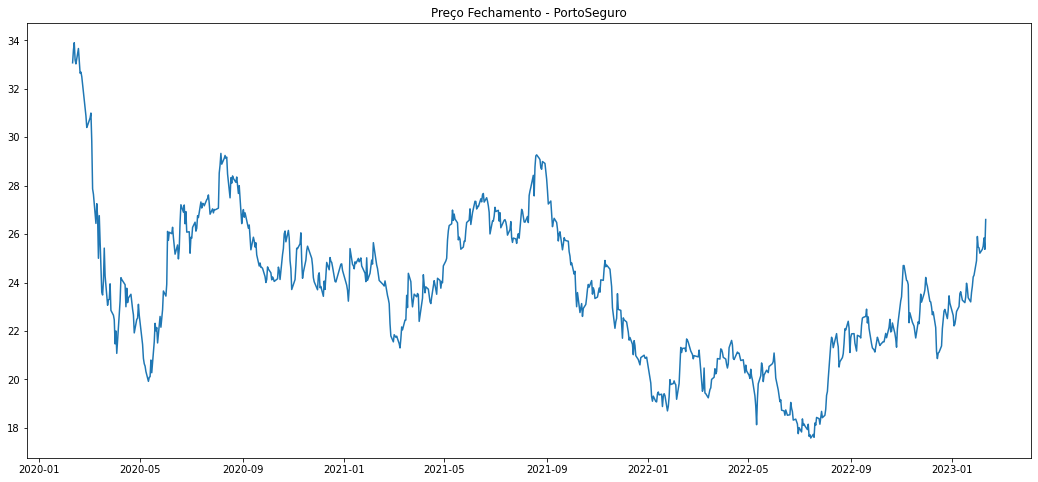

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.plot(PortoSeguro['Close'])
plt.title('Preço Fechamento - PortoSeguro')
fig

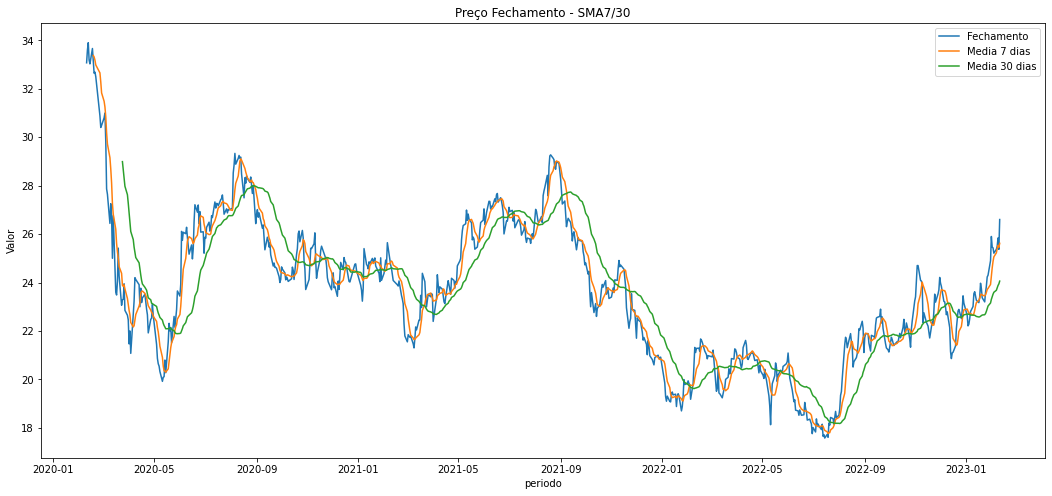

In [ ]:
periodo = 5
PortoSeguro['Close'].rolling(window=periodo).mean()

fig = plt.figure(figsize=(18,8))
plt.plot(PortoSeguro['Close'])
plt.plot(PortoSeguro['Close'].rolling(window=periodo + 2).mean())
plt.plot(PortoSeguro['Close'].rolling(window=periodo + 25).mean())
plt.title('Preço Fechamento - SMA7/30')
plt.legend(['Fechamento', 'Media 7 dias', 'Media 30 dias'])
plt.xlabel('periodo')
plt.ylabel('Valor')
fig

#### Ambev

In [ ]:
Ambev = web.get_data_yahoo('ABEV3.SA', period='3y')
Ambev

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-10,16.980000,17.100000,16.580000,16.730000,14.830988,17027200
2020-02-11,16.850000,16.930000,16.620001,16.799999,14.893042,21283300
2020-02-12,16.719999,16.870001,16.480000,16.650000,14.760070,36408300
2020-02-13,16.540001,16.670000,16.270000,16.270000,14.423203,15697100
2020-02-14,16.270000,16.549999,16.100000,16.410000,14.547311,23398800
...,...,...,...,...,...,...
2023-02-06,13.040000,13.200000,12.950000,13.020000,13.020000,25649000
2023-02-07,13.020000,13.080000,12.890000,12.960000,12.960000,22344400
2023-02-08,13.040000,13.240000,12.930000,13.190000,13.190000,24324300


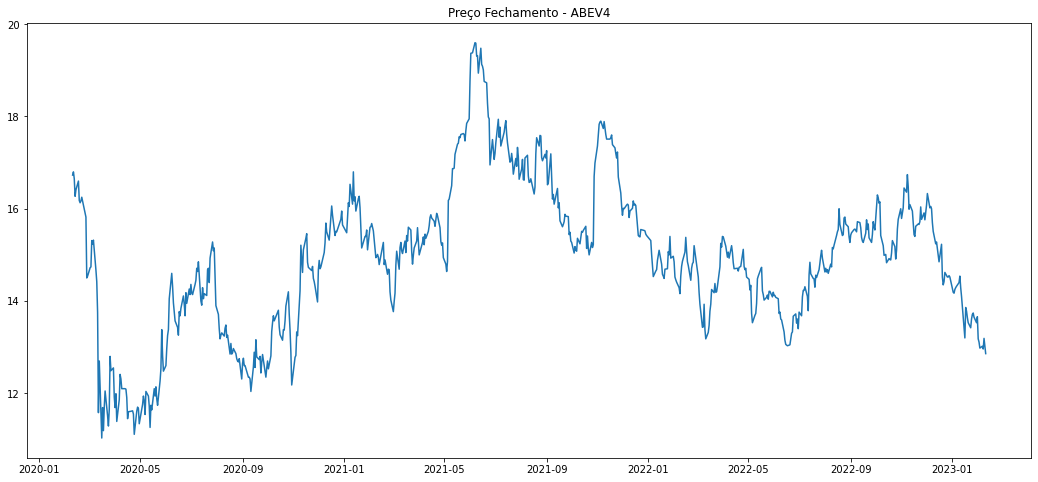

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.plot(Ambev['Close'])
plt.title('Preço Fechamento - ABEV4')
fig

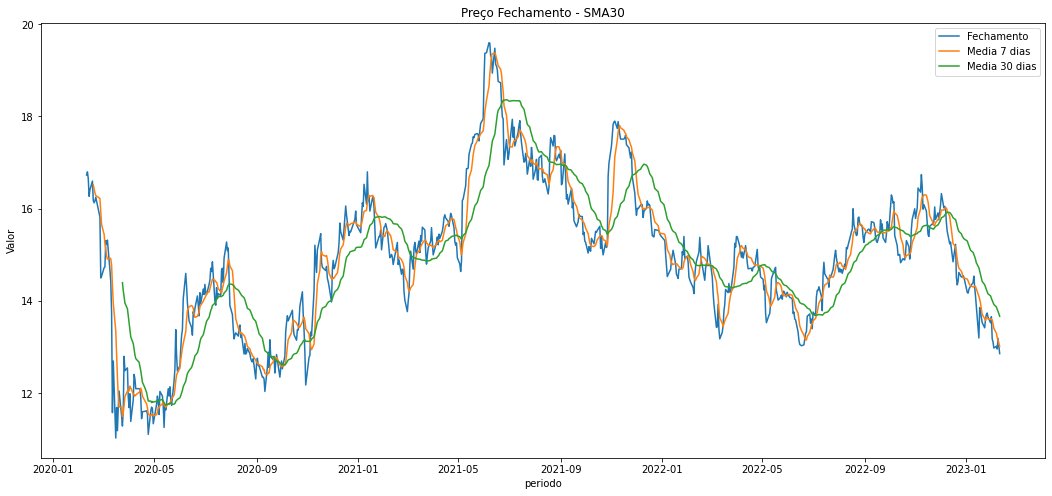

In [ ]:
periodo = 5
Ambev['Close'].rolling(window=periodo).mean()

fig = plt.figure(figsize=(18,8))
plt.plot(Ambev['Close'])
plt.plot(Ambev['Close'].rolling(window=periodo + 2).mean())
plt.plot(Ambev['Close'].rolling(window=periodo + 25).mean())
plt.title('Preço Fechamento - SMA30')
plt.legend(['Fechamento', 'Media 7 dias', 'Media 30 dias'])
plt.xlabel('periodo')
plt.ylabel('Valor')
fig

#### B3

In [ ]:
B3 = web.get_data_yahoo('B3SA3.SA', period='3y')
B3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-10,16.093332,16.316666,15.876666,16.209999,14.255048,29114100
2020-02-11,16.350000,16.483334,16.113333,16.299999,14.334193,18242700
2020-02-12,16.306665,16.889999,16.166666,16.626665,14.621464,34566600
2020-02-13,16.236666,16.656666,16.236666,16.526667,14.533525,29439300
2020-02-14,16.516666,16.756666,16.433332,16.733334,14.715266,29980800
...,...,...,...,...,...,...
2023-02-06,11.990000,12.150000,11.730000,12.110000,12.110000,30877600
2023-02-07,12.000000,12.080000,11.440000,11.890000,11.890000,59353900
2023-02-08,11.890000,12.360000,11.890000,12.120000,12.120000,36033200


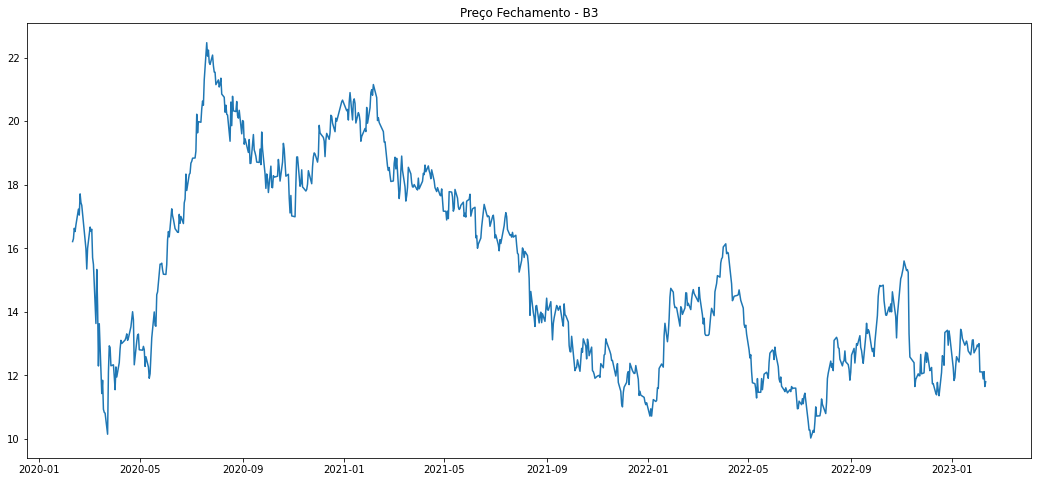

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.plot(B3['Close'])
plt.title('Preço Fechamento - B3')
fig

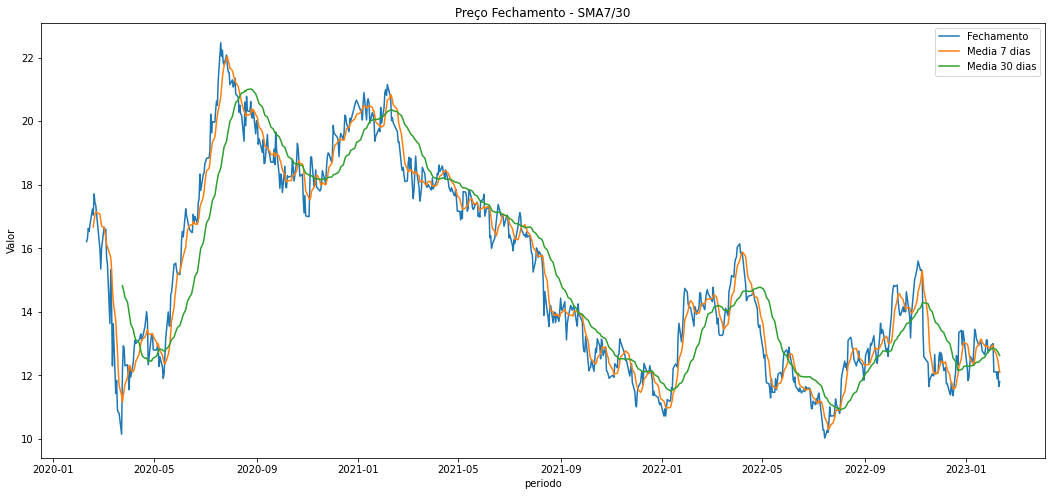

In [ ]:
periodo = 5
B3['Close'].rolling(window=periodo).mean()

fig = plt.figure(figsize=(18,8))
plt.plot(B3['Close'])
plt.plot(B3['Close'].rolling(window=periodo + 2).mean())
plt.plot(B3['Close'].rolling(window=periodo + 25).mean())
plt.title('Preço Fechamento - SMA7/30')
plt.legend(['Fechamento', 'Media 7 dias', 'Media 30 dias'])
plt.xlabel('periodo')
plt.ylabel('Valor')
fig

### Balanço negativo

#### Petrobras

In [ ]:
Petrobras = web.get_data_yahoo('PETR4.SA', period='3y')
Petrobras

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-10,28.889999,29.129999,28.639999,29.129999,13.835685,45328100
2020-02-11,29.400000,29.629999,29.260000,29.480000,14.001922,37518200
2020-02-12,29.639999,30.280001,29.629999,30.129999,14.310649,64851000
2020-02-13,29.770000,30.209999,29.639999,29.719999,14.115916,55277100
2020-02-14,29.860001,29.959999,29.340000,29.420000,13.973426,30399900
...,...,...,...,...,...,...
2023-02-06,24.870001,25.870001,24.750000,25.780001,25.780001,82794500
2023-02-07,25.910000,26.139999,25.459999,25.620001,25.620001,55311800
2023-02-08,25.799999,26.150000,25.559999,26.049999,26.049999,48713100


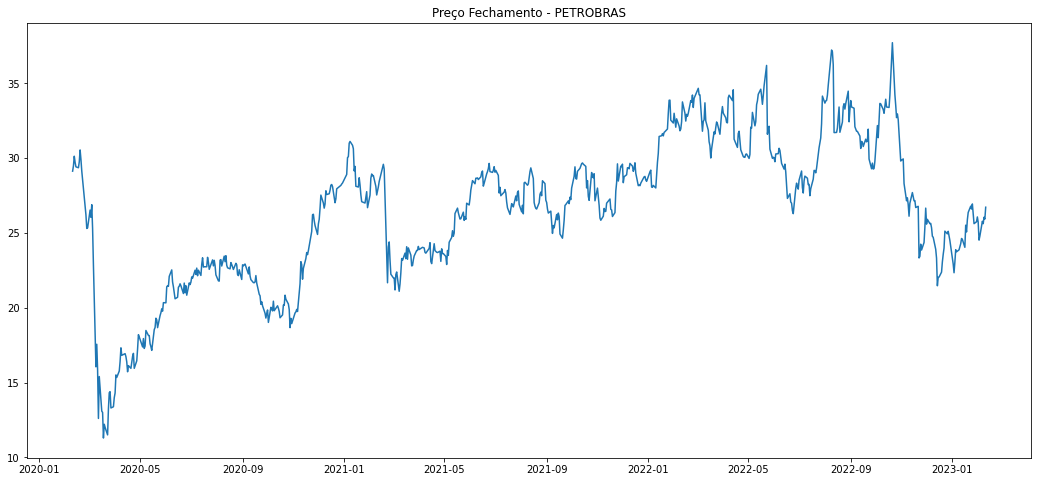

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.plot(Petrobras['Close'])
plt.title('Preço Fechamento - PETROBRAS')
fig

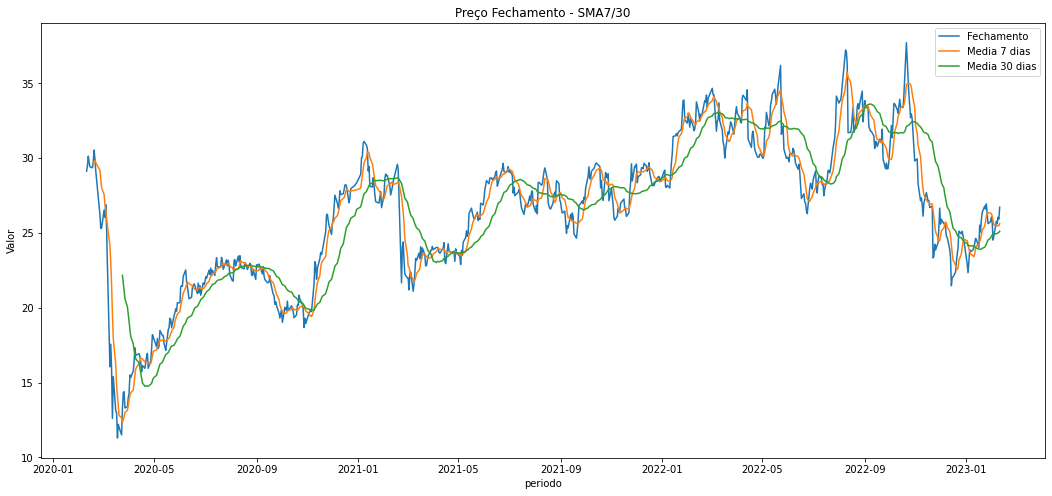

In [ ]:
periodo = 5
Petrobras['Close'].rolling(window=periodo).mean()

fig = plt.figure(figsize=(18,8))
plt.plot(Petrobras['Close'])
plt.plot(Petrobras['Close'].rolling(window=periodo + 2).mean())
plt.plot(Petrobras['Close'].rolling(window=periodo + 25).mean())
plt.title('Preço Fechamento - SMA7/30')
plt.legend(['Fechamento', 'Media 7 dias', 'Media 30 dias'])
plt.xlabel('periodo')
plt.ylabel('Valor')
fig

#### JBS

In [ ]:
JBS = web.get_data_yahoo('JBSS3.SA', period='3y')
JBS

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-10,25.670000,26.080000,24.980000,25.510000,20.712255,14436700
2020-02-11,25.719999,26.000000,25.530001,25.959999,21.077623,10322900
2020-02-12,26.290001,26.360001,25.240000,25.809999,20.955835,15832900
2020-02-13,25.410000,26.650000,25.260000,26.290001,21.345560,21995900
2020-02-14,26.299999,26.389999,25.620001,25.780001,20.931473,9919100
...,...,...,...,...,...,...
2023-02-06,19.440001,19.440001,18.870001,19.120001,19.120001,17521000
2023-02-07,19.190001,19.190001,18.629999,18.790001,18.790001,14814600
2023-02-08,18.930000,19.020000,18.540001,18.820000,18.820000,7859200


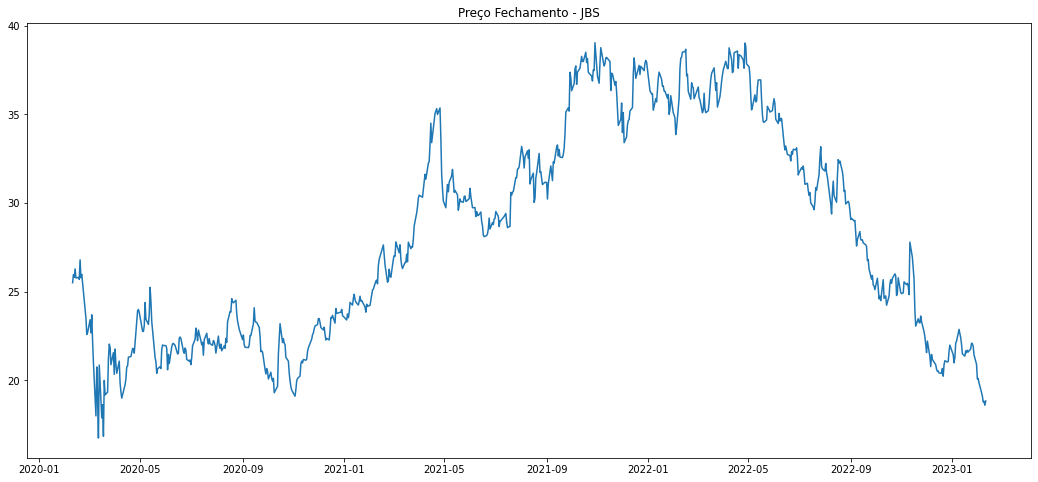

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.plot(JBS['Close'])
plt.title('Preço Fechamento - JBS')
fig

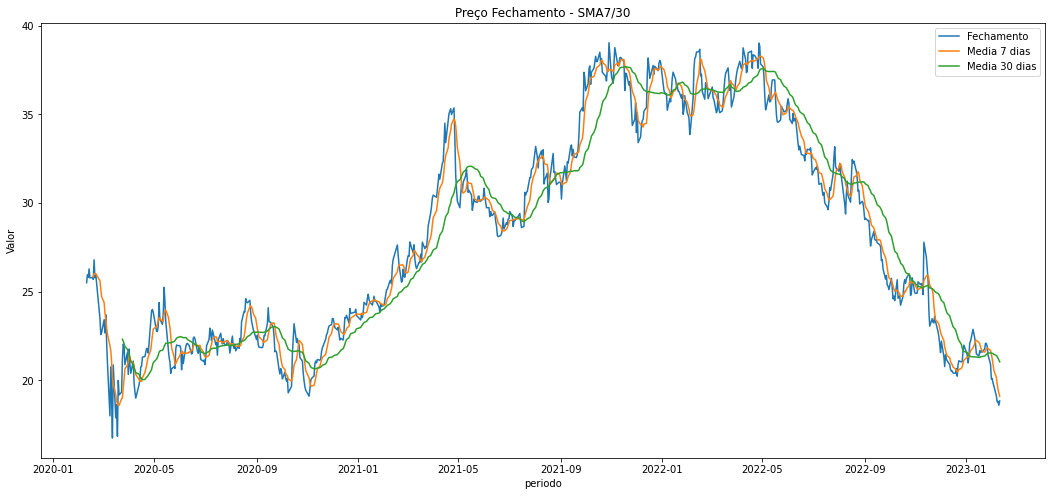

In [ ]:
periodo = 5
JBS['Close'].rolling(window=periodo).mean()

fig = plt.figure(figsize=(18,8))
plt.plot(JBS['Close'])
plt.plot(JBS['Close'].rolling(window=periodo + 2).mean())
plt.plot(JBS['Close'].rolling(window=periodo + 25).mean())
plt.title('Preço Fechamento - SMA7/30')
plt.legend(['Fechamento', 'Media 7 dias', 'Media 30 dias'])
plt.xlabel('periodo')
plt.ylabel('Valor')
fig

#### Suzano

In [ ]:
Suzano = web.get_data_yahoo('SUZB3.SA', period='3y')
Suzano

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-10,37.689999,38.119999,36.400002,37.000000,34.761829,6614600
2020-02-11,37.150002,38.540001,36.910000,38.490002,36.161697,4951400
2020-02-12,38.540001,40.419998,38.500000,40.000000,37.580353,8683200
2020-02-13,39.500000,42.070000,39.049999,41.299999,38.801716,14330100
2020-02-14,41.599998,41.799999,39.560001,39.810001,37.401852,8251400
...,...,...,...,...,...,...
2023-02-06,46.630001,46.639999,45.799999,45.959999,45.959999,5216600
2023-02-07,46.099998,46.730000,45.520000,46.060001,46.060001,4399300
2023-02-08,46.139999,46.220001,45.720001,45.950001,45.950001,3594400


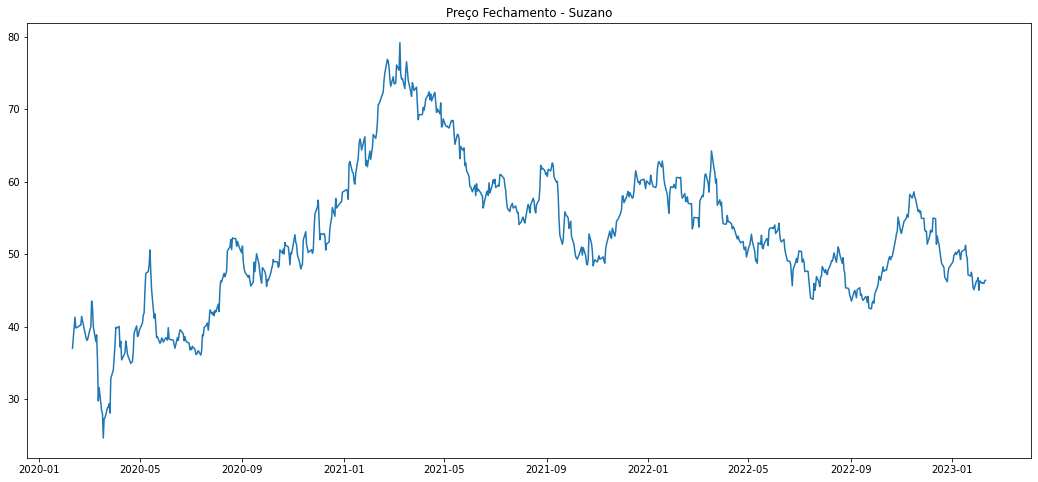

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.plot(Suzano['Close'])
plt.title('Preço Fechamento - Suzano')
fig

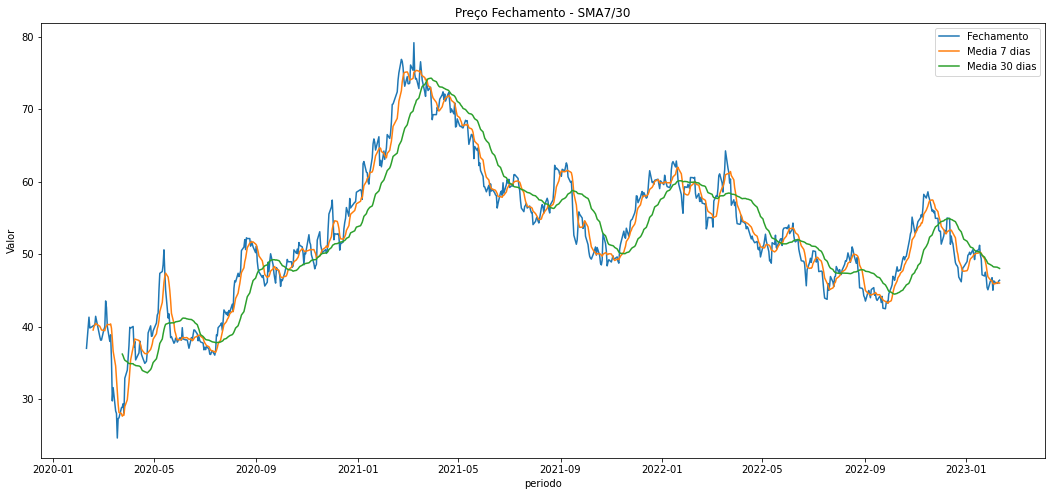

In [ ]:
periodo = 5
Suzano['Close'].rolling(window=periodo).mean()

fig = plt.figure(figsize=(18,8))
plt.plot(Suzano['Close'])
plt.plot(Suzano['Close'].rolling(window=periodo + 2).mean())
plt.plot(Suzano['Close'].rolling(window=periodo + 25).mean())
plt.title('Preço Fechamento - SMA7/30')
plt.legend(['Fechamento', 'Media 7 dias', 'Media 30 dias'])
plt.xlabel('periodo')
plt.ylabel('Valor')
fig